<a href="https://colab.research.google.com/github/saasha2926/ML-Projects-/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [9]:
df = pd.read_csv("creditcard.csv")

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [10]:
df.shape

(79318, 31)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79318 entries, 0 to 79317
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    79318 non-null  int64  
 1   V1      79318 non-null  float64
 2   V2      79318 non-null  float64
 3   V3      79318 non-null  float64
 4   V4      79318 non-null  float64
 5   V5      79318 non-null  float64
 6   V6      79318 non-null  float64
 7   V7      79318 non-null  float64
 8   V8      79318 non-null  float64
 9   V9      79318 non-null  float64
 10  V10     79318 non-null  float64
 11  V11     79317 non-null  float64
 12  V12     79317 non-null  float64
 13  V13     79317 non-null  float64
 14  V14     79317 non-null  float64
 15  V15     79317 non-null  float64
 16  V16     79317 non-null  float64
 17  V17     79317 non-null  float64
 18  V18     79317 non-null  float64
 19  V19     79317 non-null  float64
 20  V20     79317 non-null  float64
 21  V21     79317 non-null  float64
 22

In [12]:
df.isnull().sum().sum()

20

In [13]:
df= df.dropna()

In [17]:
fraud = df[df['Class']==1]
valid = df[df['Class']==0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print(len(fraud))
print(len(valid))


0.0024138715466471197
191
79126


In [18]:
print(fraud.Amount.describe())
print(valid.Amount.describe())

count     191.000000
mean       95.142251
std       214.122813
min         0.000000
25%         1.000000
50%         7.520000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64
count    79126.000000
mean        97.773259
std        269.765878
min          0.000000
25%          7.700000
50%         26.925000
75%         89.000000
max      19656.530000
Name: Amount, dtype: float64


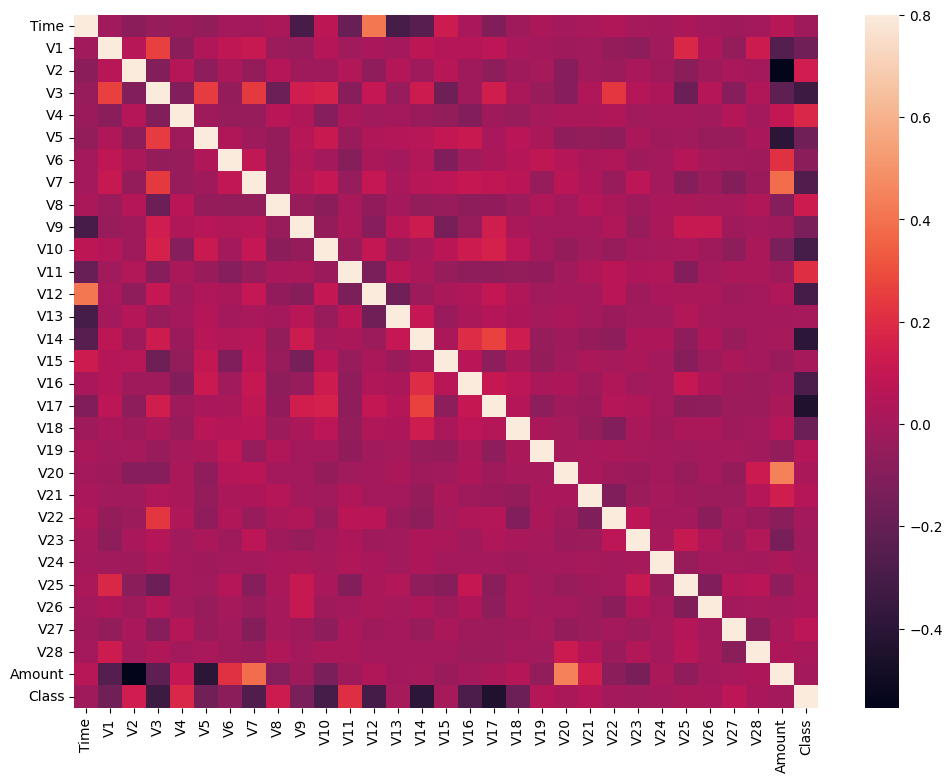

In [22]:
corrmat = df.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8)
plt.show()

In [24]:
x = df.drop("Class",axis = 1)
y = df['Class']
xData = x.values
yData =  y.values

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xData,yData,test_size = 0.2,random_state = 42)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)


In [33]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score
n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))




The model used is Random Forest classifier
The accuracy is 0.9992435703479576
The precision is 0.9354838709677419
The recall is 0.7435897435897436
The F1-Score is 0.8285714285714286


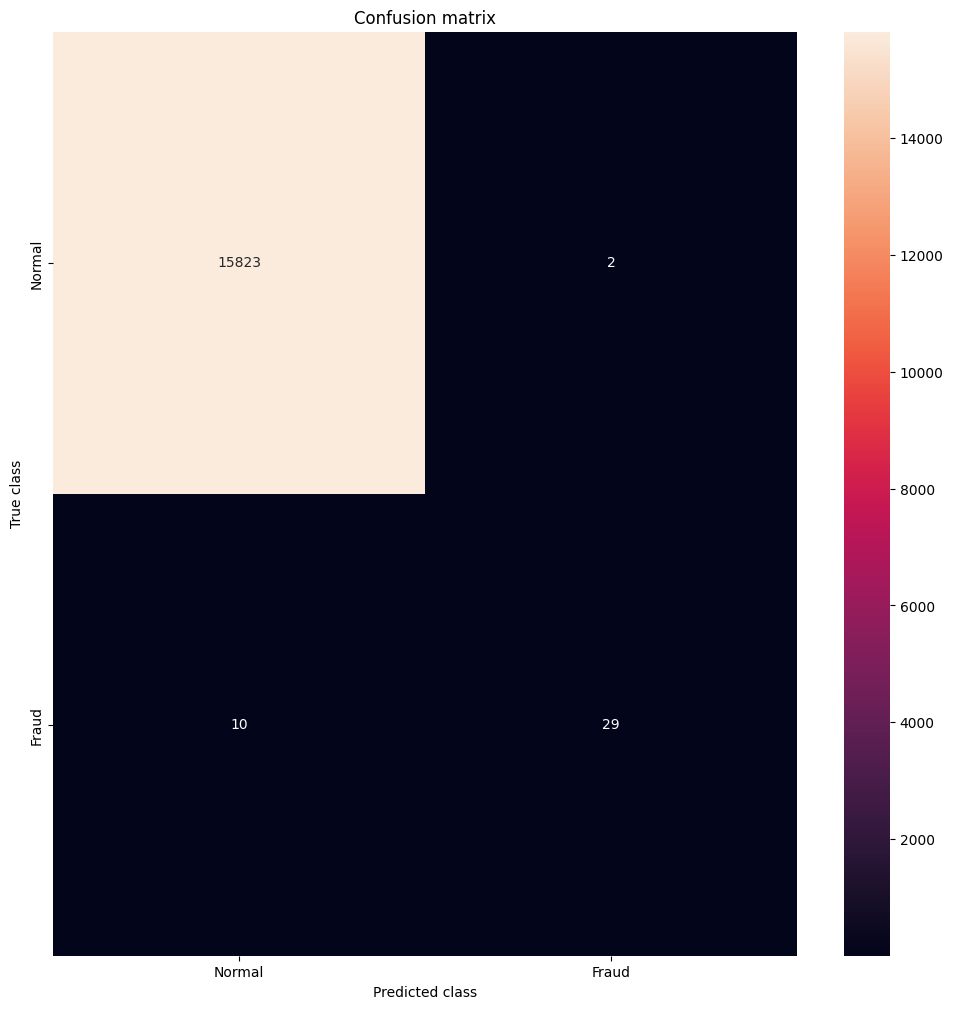

In [34]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()